In [1]:
import numpy as np
import pandas as pd
import regex as re
from datetime import datetime as dt
import timedelta as td
import os

#
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def abriPlanilha():
    for arquivo in os.listdir('.'):
        if (re.findall('csv', arquivo)):
            return arquivo
    
ins = pd.read_csv(abriPlanilha()
                 ,header=1
                 ,sep=','
                 )

In [3]:
colunas=['col1','col2','col3','situacao','nroInscricao','nome',
        'cpf','dataNascimento','genero','escolaridade',
        'instituicao','telefone','email','cep','bairro',
        'cidade','incluiOutro','perfil','observacao','perfis']

ins.columns=colunas

In [4]:
def columnsDrop():
    ins.drop('situacao', axis=1, inplace=True)
    ins.dropna(axis=1, how='all', inplace=True)
    ins.dropna(axis=0, how='all', inplace=True)

columnsDrop()

In [5]:
def columnsInsert():
    ins.insert(4, 'idade', 0)
    ins.insert(5, 'dataNascAjustada', ' ')
    ins.insert(7, 'generoId', 99)
    ins.insert(9, 'escolaridadeId', 0)
    ins.insert(10, 'escolaridade2', ' ')
    ins.insert(12, 'instituicaoId', 0)
    ins.insert(18, 'cidadeId', 0)
    ins.insert(22, 'tamanhoCamisetaId', 0)

columnsInsert()

In [6]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 34
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nroInscricao       35 non-null     object
 1   nome               35 non-null     object
 2   cpf                35 non-null     object
 3   dataNascimento     35 non-null     object
 4   idade              35 non-null     int64 
 5   dataNascAjustada   35 non-null     object
 6   genero             35 non-null     object
 7   generoId           35 non-null     int64 
 8   escolaridade       35 non-null     object
 9   escolaridadeId     35 non-null     int64 
 10  escolaridade2      35 non-null     object
 11  instituicao        32 non-null     object
 12  instituicaoId      35 non-null     int64 
 13  telefone           35 non-null     object
 14  email              35 non-null     object
 15  cep                35 non-null     object
 16  bairro             35 non-null     object
 17  cida

In [7]:
ins.head(3)

,nroInscricao,nome,cpf,dataNascimento,idade,dataNascAjustada,genero,generoId,escolaridade,escolaridadeId,...,telefone,email,cep,bairro,cidade,cidadeId,incluiOutro,perfil,observacao,tamanhoCamisetaId
0,1,Isabelle Victoria Pereira De Souza,51454217880,12/09/2003,0,,Feminino,99,Ensino Superior,0,...,11954852961,isabellevictoria.urs@gmail.com,08121-620,Jd Nélia,São Paulo,0,N,Desenvolvedor,Tamanho de Camiseta: M,0
1,2,Guilherme Antunes de Campos,50069148821,03/06/2004,0,,Masculino,99,Ensino Superior Cursando,0,...,11959762456,guiancam@gmail.com,7091000,Vila Progresso,Guarulhos,0,N,Desenvolvedor,Tamanho de Camiseta: G,0
2,3,Wezilyana Melice Farias de Lima,1264343442,13/08/1983,0,,Feminino,99,Pós-graduação completo,0,...,11992471992,lilyfarias@gmail.com,1529001,Aclimação,São Paulo,0,N,Analista de Negócios,Tamanho de Camiseta: M,0


In [8]:
def ajusteData(dataNasc) -> str:
    dia=int(dataNasc[:2])
    if (dia>31):
        novaData=dataNasc[0]+'/'+dataNasc[1:3]+'/'+dataNasc[3:]
    else:
        novaData=dataNasc[:2]+'/'+dataNasc[2:3]+'/'+dataNasc[3:]
    
    return novaData
    
def dataNascAjustada(dataNasc):
    if (not re.findall('/', dataNasc)):
        dataNasc=ajusteData(dataNasc)        
        
    dtNasc=dt.strptime(dataNasc, '%d/%m/%Y')
    dtNasc=dt.strftime(dtNasc, '%d/%m/%Y %H:%M:%S ')        
    return dtNasc

def quantIdade(pDataNascimento) -> int:
    dataNascimento=str(pDataNascimento)
    if (not re.findall('/', dataNascimento)):
        #return -1
        dataNascimento = ajusteData(str(pDataNascimento))
    
    dataNewFormat=dt.strptime(str(dt.strptime(dataNascimento, '%d/%m/%Y')),'%Y-%m-%d %H:%M:%S')
    
    dif = (dt.today()-dataNewFormat)
    dias = dif.days
    anos, dias = divmod(dias, 365)
    return anos

def quantGenero(genero) -> int:
    if (genero.upper()=='FEMININO'):
        return 1
    elif (genero.upper()=='MASCULINO'):
        return 2
    else:
        return 99
    
def quantEscolaridade(escolaridade) -> int:
    escolaridade=escolaridade.upper()
    valor=-1
    if re.findall('M[EÉ]DIO', escolaridade):
        valor=10
    elif (re.findall('SUPERIOR', escolaridade) or
         re.findall('FACULDADE', escolaridade)):
        valor=20
    elif re.findall('P[ÓO]S', escolaridade):
        valor=30
    elif re.findall('MESTRADO', escolaridade):
        valor=40
    elif re.findall('DOUTORADO', escolaridade):
        valor=50
    else:
        return valor
          
    if (not (re.findall('INCOMPLETO', escolaridade) or 
        re.findall('CURSANDO', escolaridade))):
        valor+=5
        
    return valor

def qualEscolaridade(escolaridade) -> str:
    escolaridade=escolaridade.upper()
    texto='N/D'
    if re.findall('M[EÉ]DIO', escolaridade):
        texto='ENSINO MÉDIO'
    elif (re.findall('SUPERIOR', escolaridade) or
         re.findall('FACULDADE', escolaridade)):
        texto='ENSINO SUPERIOR'
    elif re.findall('P[ÓO]S', escolaridade):
        texto='PÓS-GRADUAÇÃO'
    elif re.findall('MESTRADO', escolaridade):
        texto='MESTRADO'
    elif re.findall('DOUTORADO', escolaridade):
        texto='DOUTORADO'
    else:
        return texto
          
    if (not (re.findall('INCOMPLETO', escolaridade) or 
        re.findall('CURSANDO', escolaridade))):
        texto=texto+' COMPLETO'
    else:
        texto=texto+' INCOMPLETO/CURSANDO'
        
    return texto

def quantInstituicao(pInstituicao) -> int:
    tp=type(pInstituicao)
    if (tp==str):
        pInst=pInstituicao.upper()
        
        if (re.findall('BELAS ARTES', pInst)):
            return 1
        elif (re.findall('FATEC', pInst)):
            return 2
        elif (re.findall('WYDEN', pInst)):
            return 3
        elif (re.findall('JUDAS', pInst)):
            return 4
        elif (re.findall('IFSP', pInst) or re.findall('INSTITUTO FEDERAL', pInst)):
            return 5
        elif (re.findall('ENIAC', pInst)):
            return 6
        elif (re.findall('FIAP', pInst)):
            return 7
        elif (re.findall('FAM', pInst)):
            return 8
        elif (re.findall('UNICAMP', pInst)):
            return 9
        elif (re.findall('ETEC', pInst)):
            return 10
        elif (re.findall('LICEU', pInst)):
            return 11
        elif (re.findall('MOACYR CAMPOS', pInst)):
            return 12
        elif (re.findall('USP', pInst) or re.findall('UNIVERSIDADE DE SÃO PAULO', pInst)):
            return 13
        elif (re.findall('DRUMMOND', pInst)):
            return 14
        elif (re.findall('IMPACTA', pInst)):
            return 15
        elif (re.findall('VUNESP', pInst)):
            return 16
        elif (re.findall('SALÉM', pInst)):
            return 17
        else:
            return 99
      
    elif (tp==float):
        return 0

    return 99

def quantCidade(cidade) -> int:
    cidade=cidade.upper()
    if cidade=='GUARULHOS':
        return 1
    elif cidade=='SÃO PAULO':
        return 2
    elif cidade=='RIBEIRÃO PRETO':
        return 3
    elif cidade=='SANTO ANDRE':
        return 4
    elif cidade=='GUARUJA':
        return 5
    else:
        return 99

def quantTamanhoCamiseta(pTamanho) -> int:
    t=re.split('\s',pTamanho)
    if (t[len(t)-1]=='P'):
        return 1
    elif (t[len(t)-1]=='M'):
        return 2
    elif (t[len(t)-1]=='G'):
        return 3
    elif (t[len(t)-1]=='GG'):
        return 4
    else:
        return 99    

#
ins['idade']=ins['dataNascimento'].apply(lambda dtNasc: quantIdade(dtNasc))
ins['dataNascAjustada']=ins['dataNascimento'].apply(lambda dtNasc: dataNascAjustada(dtNasc))
ins['generoId']=ins['genero'].apply(lambda genero: quantGenero(genero))
ins['escolaridadeId']=ins['escolaridade'].apply(lambda escolaridade: quantEscolaridade(escolaridade))
ins['escolaridade2']=ins['escolaridade'].apply(lambda escolaridade: qualEscolaridade(escolaridade))
ins['instituicaoId']=ins['instituicao'].apply(lambda instituicao: quantInstituicao(instituicao))
ins['cidadeId']=ins['cidade'].apply(lambda cidade: quantCidade(cidade))
ins['tamanhoCamisetaId']=ins['observacao'].apply(lambda obs: quantTamanhoCamiseta(obs))


In [9]:
ins

,nroInscricao,nome,cpf,dataNascimento,idade,dataNascAjustada,genero,generoId,escolaridade,escolaridadeId,...,telefone,email,cep,bairro,cidade,cidadeId,incluiOutro,perfil,observacao,tamanhoCamisetaId
0,1,Isabelle Victoria Pereira De Souza,51454217880,12/09/2003,20,12/09/2003 00:00:00,Feminino,1,Ensino Superior,25,...,11954852961,isabellevictoria.urs@gmail.com,08121-620,Jd Nélia,São Paulo,2,N,Desenvolvedor,Tamanho de Camiseta: M,2
1,2,Guilherme Antunes de Campos,50069148821,03/06/2004,19,03/06/2004 00:00:00,Masculino,2,Ensino Superior Cursando,20,...,11959762456,guiancam@gmail.com,7091000,Vila Progresso,Guarulhos,1,N,Desenvolvedor,Tamanho de Camiseta: G,3
2,3,Wezilyana Melice Farias de Lima,1264343442,13/08/1983,40,13/08/1983 00:00:00,Feminino,1,Pós-graduação completo,35,...,11992471992,lilyfarias@gmail.com,1529001,Aclimação,São Paulo,2,N,Analista de Negócios,Tamanho de Camiseta: M,2
3,4,Jéssica Bueno Ramos,51713271818,11/01/2005,19,11/01/2005 00:00:00,Feminino,1,Ensino Superior Cursando,20,...,11963095666,jessicabuenoramos5@gmail.com,7141420,Jardim Santa Emília,Guarulhos,1,N,Universitário,Tamanho de Camiseta: M,2
4,5,Gabriel Vinícius Rocha Barboza,46993988801,17/01/2005,19,17/01/2005 00:00:00,Masculino,2,Cursando Ensino Superior em Análise e desenvol...,20,...,(11) 94585-0708,gabrielrochabarboza@gmail.com,07135-720,Vila Sítio dos Morros,Guarulhos,1,N,Desenvolvedor,Tamanho de Camiseta: G,3
5,6,Richard Klaoss Neumann,54807928813,30/07/2005,18,30/07/2005 00:00:00,Masculino,2,Ensino médio e técnico completo,15,...,11997103862,richardklaossneumann@gmail.com,7230450,Parque Uirapuru,Guarulhos,1,N,Estudante de programação e concurso,Tamanho de Camiseta: G,3
6,7,Cristofer Batista da Silva,48859050871,14/02/2005,18,14/02/2005 00:00:00,Masculino,2,Ensino Médio Completo,15,...,16996194782,cristofersilva.rp@gmail.com,14050220,Vila Amélia,Ribeirão Preto,3,N,Empreendedor e Designer de UX,Tamanho de Camiseta: G,3
7,8,Thiago Henrique Silva,38298390814,22/06/2002,21,22/06/2002 00:00:00,Masculino,2,Ensino Superior Incompleto,20,...,16993599793,thiago@roihack.com.br,14051-330,Sumarezinho,Ribeirão Preto,3,N,Analista de Negócios,Tamanho de Camiseta: M,2
8,9,Anaíle Silva de Oliveira,23033966896,19/02/2002,21,19/02/2002 00:00:00,Feminino,1,Ensino Superior Incompleto,20,...,11987613499,autoconhecimento.ana@gmail.com,7113090,Macedo,Guarulhos,1,N,Meu Primeiro Hackathon,Tamanho de Camiseta: M,2
9,10,Leonardo dos Reis Souza,53872905880,23/09/2003,20,23/09/2003 00:00:00,Masculino,2,Cursando superior,20,...,11966030157,leonardoleoreissouza05@gmail.com,08490-600,Cidade Tiradentes,São Paulo,2,N,Desenvolvedor,Tamanho de Camiseta: M,2


In [10]:
X = ins['escolaridade2']
y = ins['idade']

### Gráficos

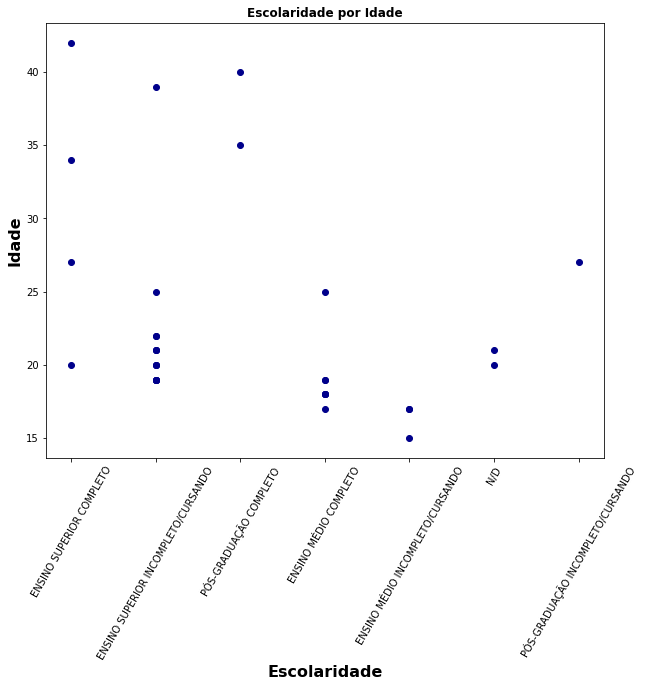

In [11]:
plt.figure(figsize=(10,8))
plt.title('Escolaridade por Idade', fontdict={'weight':'bold'})
plt.scatter(X,y,c='darkblue',marker='o')
plt.xlabel('Escolaridade', fontdict={'weight':'bold','size':16})
plt.ylabel('Idade', fontdict={'weight':'bold','size':16})
plt.xticks(rotation=60)
plt.show()